In [10]:
# Write a program to implementing a simple neural network using tensorflow/keras.

import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('diabetes.csv')
df.head()

print ('Number of Rows :', df.shape[0])
print ('Number of Columns :', df.shape[1])
print ('Number of Patients with outcome 1 :', df.Outcome.sum())
print ('Event Rate :', round(df.Outcome.mean()*100,2) ,'%')
df.describe()


Number of Rows : 768
Number of Columns : 9
Number of Patients with outcome 1 : 268
Event Rate : 34.9 %


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split
X = df.to_numpy()[:,0:8] 
Y = df.to_numpy()[:,8]
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)
print (f'Shape of Train Data : {X_train.shape}')
print (f'Shape of Test Data : {X_test.shape}')


Shape of Train Data : (576, 8)
Shape of Test Data : (192, 8)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 24)                  │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4942 - loss: 3.2302
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5444 - loss: 1.1892 
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5968 - loss: 0.8661 
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6418 - loss: 0.7260 
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6951 - loss: 0.6410 
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 0.7154 
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6926 - loss: 0.6744 
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 0.6867 
Epoch 9/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - loss: 0.6409 
Epoch 10/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - loss: 0.6534 
Epoch 11/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6989 - loss: 0.5991 
Epoch 12/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

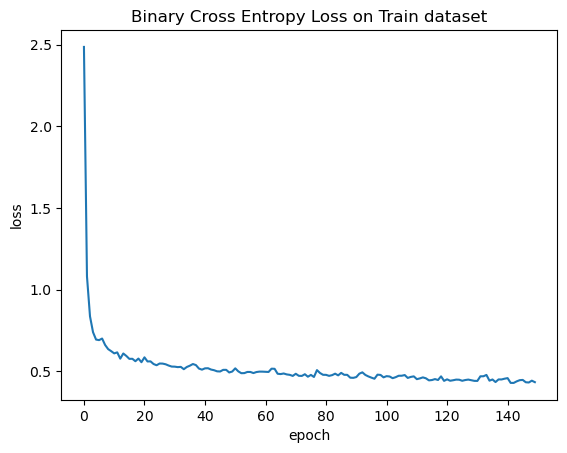

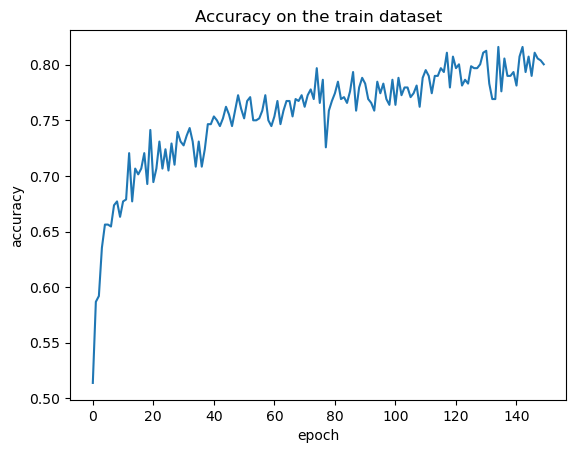

In [9]:
model = Sequential([
    Input(shape=(8,)),  # Define the input shape using the new `shape` argument  , only first 8 columns
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# Compile the model (optional, but necessary for training)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Summary of the model
#model.summary()
model.summary()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose = 1)

# Plotting loss
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch') #iteration
plt.show()

# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
